In [78]:
#Importing packages
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
%matplotlib inline 

#Extras
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
from pylab import *
from ipywidgets import interact
from IPython.lib.display import YouTubeVideo

<div>
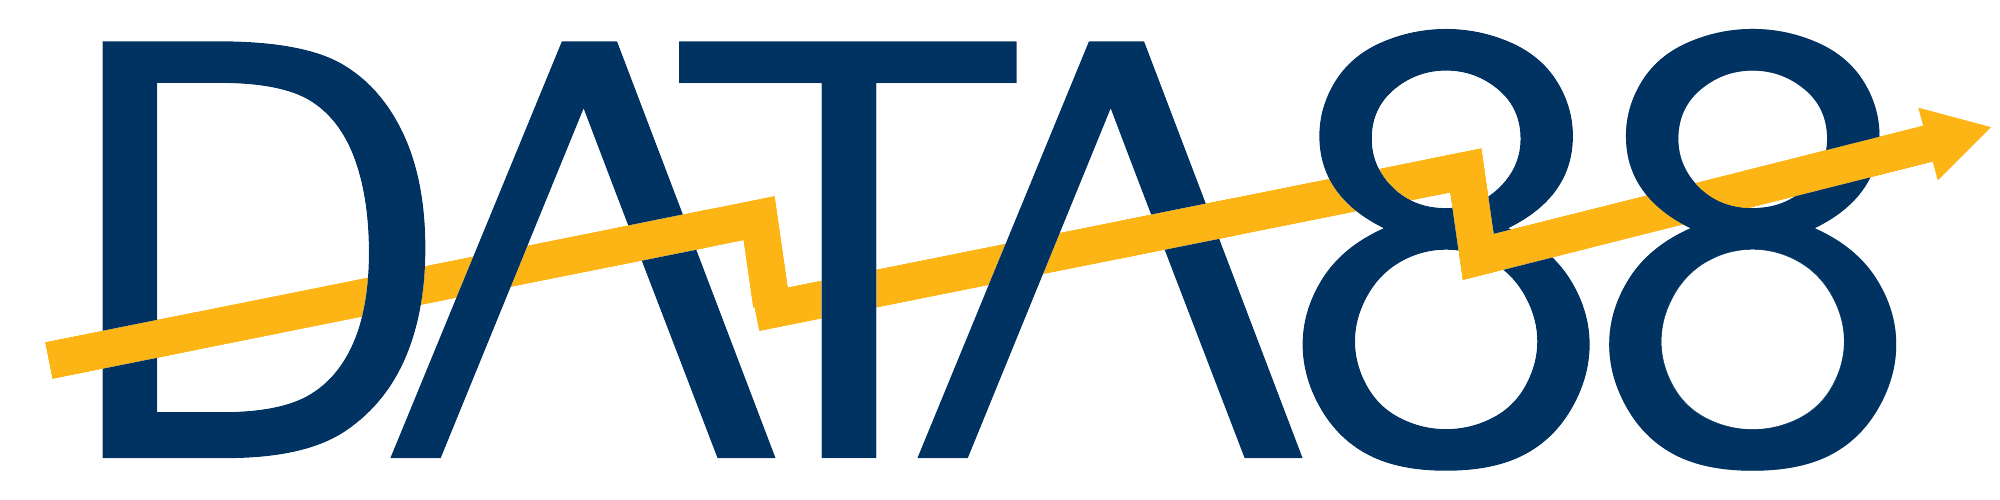
</div>

# Plotting Global Emissions with Rosling Plots

**Written by**: Prof. Eric Van Dusen, Peter F. Grinde-Hollevik

Inspired by the late Professor Hans Rösling's wonderful contributions to the world of data science, this notebook aims to take usage of his "bubble charts" in understanding the historical, global emissions of the last century.

As a warm-up exercise, feel free to check out his legendary "200 Countries, 200 years, 4 minutes" from the BBC series The Joy of Stats. This video plots life expectancy over changing per capita income. After watching this, I'm certain you'll agree that few communicate their passion for global statistics more sincere than Professor Rösling.

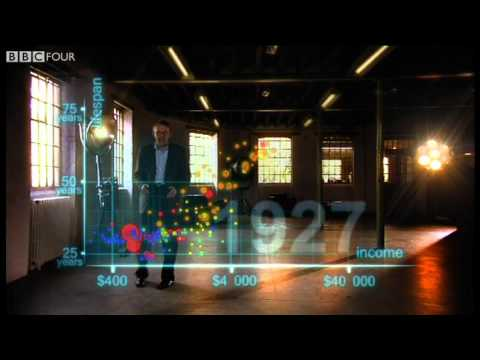

In [79]:
YouTubeVideo('jbkSRLYSojo')

## Building Our Rosling Plot

The goal of this exercise is to gain some experience in data cleaning, making sense of it with basic plots, and present it in the most "friendly" manner for scientific communication. The two first will be accomplished by using tools from DATA 8, while the latter requires the usage of methods you might not be familiar with yet. However, with this walkthrough, you ought to be more comfortable with building a Rosling Plot of your own in the future.

We start off by importing a Gapminder Foundation Dataset containing per capita GDP and per capita emissions of $CO_2$. 


In [80]:
#Import data
co2_table = Table.read_table('co2-emissions-vs-gdp.csv')
co2_table

Entity,Code,Year,Per capita CO2 emissions,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
Abkhazia,OWID_ABK,2015,nan,nan,nan,nan,Asia
Afghanistan,AFG,1949,0.00191237,nan,nan,7.66378e+06,nan
Afghanistan,AFG,1950,0.010871,1156,nan,7.752e+06,nan
Afghanistan,AFG,1951,0.0116837,1170,nan,7.84e+06,nan
Afghanistan,AFG,1952,0.0115423,1189,nan,7.936e+06,nan
Afghanistan,AFG,1953,0.0132159,1240,nan,8.04e+06,nan
Afghanistan,AFG,1954,0.0130359,1245,nan,8.151e+06,nan
Afghanistan,AFG,1955,0.0186057,1246,nan,8.271e+06,nan
Afghanistan,AFG,1956,0.0218121,1278,nan,8.399e+06,nan
Afghanistan,AFG,1957,0.0343433,1253,nan,8.535e+06,nan


Our first Rosling Plot will focus on the latest year of data: 2018. Hence, we select only the rows where 'Year' = 2018.

In [81]:
#Select latest year for CO2 reporting
co2_table = co2_table.where('Year', 2018)
co2_table

Entity,Code,Year,Per capita CO2 emissions,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
Afghanistan,AFG,2018,0.281197,1934.56,nan,3.7172e+07,nan
Africa,nan,2018,1.13159,nan,nan,1.27592e+09,nan
Albania,ALB,2018,1.87409,11104.2,nan,2.883e+06,nan
Algeria,DZA,2018,3.891,14228,nan,4.2228e+07,nan
American Samoa,ASM,2018,nan,nan,nan,55000,nan
Andorra,AND,2018,6.0287,nan,nan,77000,nan
Angola,AGO,2018,1.22293,7771.44,nan,3.081e+07,nan
Anguilla,AIA,2018,9.80967,nan,nan,15000,nan
Antigua and Barbuda,ATG,2018,5.2664,nan,nan,96000,nan
Argentina,ARG,2018,4.171,18556.4,nan,4.4361e+07,nan


Now, let's consider what we would like to plot for year 2018: Following Rosling's philosophy we should consider how emissions change over economic development. Hence, our x-axis should be GDP per capita. Our y-axis could be a new column: Total Emissions, made by the product of Per Capita $CO_2$ emissions and the total population of each country.

In [82]:
#Make the 'Total CO2 Emissions' column
total_co2_emissions = co2_table.column('Per capita CO2 emissions') * co2_table.column('Total population (Gapminder, HYDE & UN)')
co2_table = co2_table.with_column('Total CO2 Emissions', total_co2_emissions )
co2_table

Entity,Code,Year,Per capita CO2 emissions,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent,Total CO2 Emissions
Afghanistan,AFG,2018,0.281197,1934.56,nan,3.7172e+07,nan,1.04527e+07
Africa,nan,2018,1.13159,nan,nan,1.27592e+09,nan,1.44382e+09
Albania,ALB,2018,1.87409,11104.2,nan,2.883e+06,nan,5.403e+06
Algeria,DZA,2018,3.891,14228,nan,4.2228e+07,nan,1.64309e+08
American Samoa,ASM,2018,nan,nan,nan,55000,nan,nan
Andorra,AND,2018,6.0287,nan,nan,77000,nan,464210
Angola,AGO,2018,1.22293,7771.44,nan,3.081e+07,nan,3.76786e+07
Anguilla,AIA,2018,9.80967,nan,nan,15000,nan,147145
Antigua and Barbuda,ATG,2018,5.2664,nan,nan,96000,nan,505574
Argentina,ARG,2018,4.171,18556.4,nan,4.4361e+07,nan,1.8503e+08


Observe the 'nan' values spread across almost all columns. These are 'empty' data points, where data has simply not been collected. To ensure the validity of our analysis, we decide to remove all rows with 'per capita $CO_2$ emissions' and 'total $CO_2$ emissions' are empty. For this, we use the **.where** and **.are.above(0)** methods from DATA 8. Furthermore, we select the columns relevant to our inquiry. We also sort the table to have the biggest emitters at the top and remove any continent from the 'entity column'.

In [83]:
#Selecting relevant columns, removing 'NaN' values, & sorting descending
co2_table = co2_table.select('Entity', 'Total CO2 Emissions', 'GDP per capita')
co2_table = co2_table.sort('Total CO2 Emissions', descending=True)
co2_table = co2_table.where('Total CO2 Emissions', are.above(0))
co2_table = co2_table.where('GDP per capita', are.above(0))
continents = make_array('World', 'Asia', 'Europe', 'Africa', 'North America', 'Latin America', 'Oceania')
co2_table = co2_table.where('Entity', are.not_contained_in(continents))
co2_table

Entity,Total CO2 Emissions,GDP per capita
China,9.95657e+09,13101.7
United States,5.42488e+09,55334.7
India,2.59132e+09,6806.5
Russia,1.69136e+09,24668.9
Japan,1.13569e+09,38673.8
Iran,7.55402e+08,17011.3
Germany,7.55362e+08,46177.6
South Korea,6.34934e+08,37927.6
Canada,5.86505e+08,44868.7
Saudi Arabia,5.76758e+08,50304.8


Having cleaned our data, let us scatter it and see if we can make sense of it. But first, what do you expect to see plotting Total CO2 emissions over GDP per capita? Do you expect any outliers? If so, what countries do you think that would be?

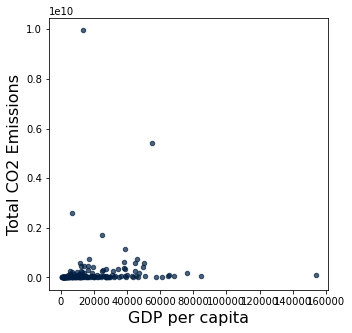

In [84]:
#Let's scatter plot our data. See any association between GDP per capita and Total CO2 Emissions?
co2_table.scatter('GDP per capita', 'Total CO2 Emissions')

This is hard to read (and looks funky!). This is much due to our outliers (large emitters and very wealthy nations). Hence, let us take the log of each axis. Percentage changes in GDP per capita should now refer to percentage changes in total emissions in each country.

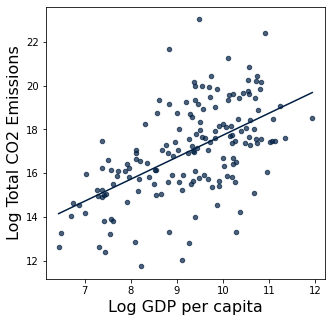

In [85]:
# use np.log on each column
gdp_log = np.log(co2_table.column('GDP per capita'))
co2_log = np.log(co2_table.column('Total CO2 Emissions'))

#Log-plot. Easier to see the association?
log_co2_table = co2_table.with_columns('Log GDP per capita', gdp_log, 'Log Total CO2 Emissions', co2_log)
log_co2_table.scatter('Log GDP per capita', 'Log Total CO2 Emissions', fit_line = True)

To find out the slope and intercept of that line fitted through the data, we run a simple Linear Regression model using Numpy.

In [86]:
x = gdp_log
y = co2_log
np.polyfit(x, y,1)

array([1.00312923, 7.70004476])

## Part 2: A Historical View on $CO_2$ emissions

As of now, it seems like we have a strong linear association between total $CO_2$ emissions and the GDP per capita. To explore this association further, let us view this from a historical perspective by answering the following question: How has the relationship between the two variables changed over time? To do so, we build the Rosling Plot we sought out in the first place; one for each year the last 120 years.

In [87]:
#For this, we need the population & continent of each country.
gapminder = Table.read_table('gapminder - gapminder.csv')
gapminder

Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.58
23,Albania,2007,3600523,Europe,76.423,5937.03
35,Algeria,2007,33333216,Africa,72.301,6223.37
47,Angola,2007,12420476,Africa,42.731,4797.23
59,Argentina,2007,40301927,Americas,75.32,12779.4
71,Australia,2007,20434176,Oceania,81.235,34435.4
83,Austria,2007,8199783,Europe,79.829,36126.5
95,Bahrain,2007,708573,Asia,75.635,29796
107,Bangladesh,2007,150448339,Asia,64.062,1391.25
119,Belgium,2007,10392226,Europe,79.441,33692.6


We use the DATA 8 method **.join** you are familiar with by now to add continent and population for each nation. The color of the "bubbles" we are making will represent the continent, while its size represents the population.

In [88]:
bubble_table = co2_table.join('Entity', gapminder, 'country')
bubble_table = bubble_table.select('Entity', 'Total CO2 Emissions', 'GDP per capita','population','continent')
bubble_table.sort('Total CO2 Emissions', descending=True)

Entity,Total CO2 Emissions,GDP per capita,population,continent
China,9.95657e+09,13101.7,1318683096,Asia
United States,5.42488e+09,55334.7,301139947,Americas
India,2.59132e+09,6806.5,1110396331,Asia
Japan,1.13569e+09,38673.8,127467972,Asia
Iran,7.55402e+08,17011.3,69453570,Asia
Germany,7.55362e+08,46177.6,82400996,Europe
Canada,5.86505e+08,44868.7,33390141,Americas
Saudi Arabia,5.76758e+08,50304.8,27601038,Asia
Indonesia,5.76584e+08,11851.7,223547000,Asia
South Africa,4.72001e+08,12165.8,43997828,Africa


Using this newly created table, we can visualize the log-plot from above in a "friendlier" manner using an imported method called Seaborn. Feel free to check out its documentation here: https://seaborn.pydata.org/generated/seaborn.scatterplot.html


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


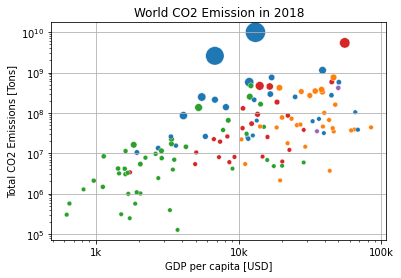

<Figure size 1500x1000 with 0 Axes>

In [89]:
# The usage of the Seaborn (sns) scatterplot is out of scope. However, try to see if you can understand parts of it!
population = bubble_table.column('population')

sns.scatterplot(bubble_table.column('GDP per capita'), bubble_table.column('Total CO2 Emissions'), hue = bubble_table.column('continent'), size= population, sizes=(20,400), legend=False)
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP per capita [USD]')
plt.ylabel('Total CO2 Emissions [Tons]')
plt.title('World CO2 Emission in 2018')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.figure(dpi=250)
plt.show()

So, this was our Rosling Plot for 2018. From here, we aim to create a function that we can apply to each year in our original dataset. Remember the one with 50.000+ entries, each representing a country in a given year?

One thing to note is that our could be changed a tad: Would it not make sense to plot $CO_2$ emissions per capita over GDP per capita? Doing so, we get a sense of the $CO_2$ intensity of GDP.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


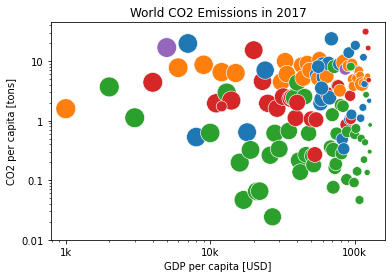

<Figure size 1500x1000 with 0 Axes>

In [93]:
#Changing from total to per capita CO2 Emissions

def the_bubble_plot(emissions_data, population_data, income_data, geography_data, year):
    
    #Selecting data for given year & relabel columns
    emissions_data = emissions_data.select('country', f"{year}").relabel(1, 'CO2 per capita [tons]')
    population_data = population_data.select('country', f"{year}").relabel(1, 'Population')
    income_data = income_data.select('country', f"{year}").relabel(1, 'GDP per capita [USD]')

    #Creating the 'the_bubble_table' with emission, population, income, continent for given year
    the_bubble_table = emissions_data.join('country', population_data)
    the_bubble_table = the_bubble_table.join('country', income_data)
    the_bubble_table = the_bubble_table.join('country', geography_data)

    #Making sure we actually have emissions data for given year!
    the_bubble_table = the_bubble_table.where('CO2 per capita [tons]', are.above(0))
    #the_bubble_table.sort('CO2 per capita [tons]',descending=True).show()
    
    
    #Using the Seaborn Scatterplot function imported
    population = the_bubble_table.column('Population')
    sns.scatterplot(the_bubble_table.column('GDP per capita [USD]'), 
    the_bubble_table.column('CO2 per capita [tons]'), 
    hue = the_bubble_table.column('continent'), 
    size= population, sizes=(20,400), legend=False)
    
    #Adjusting the plot for better vizualisation
    plt.grid(False)
    
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('GDP per capita [USD]')
    plt.ylabel('CO2 per capita [tons]')
    plt.title(f"World CO2 Emissions in {year}")
    plt.xticks([10**0, 10**1, 10**2],['1k','10k', '100k'])
    plt.yticks([10**-2, 10**-1, 10**0, 10**1],['0.01','0.1','1', '10'])
    plt.figure(dpi=250)
    
    
    plt.show()
    

    

#Importing data from the Gapminder Foundation
emissions_data = Table.read_table('co2_emissions_tonnes_per_person.csv')
population_data = Table.read_table('population_total.csv')
income_data = Table.read_table('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
geography_data = Table.read_table('gapminder - gapminder.csv').select('country', 'continent')

the_bubble_plot(emissions_data, population_data, income_data, geography_data, 2017)